# Kaggle competition: Using digital learning data to analyze the impact of COVID-19 on student learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import statistics
from statistics import mode
from sklearn import preprocessing
import seaborn as sns
import os
import glob
import openpyxl
import csv

### Data

In this competition there are three main files we will use:
   1- districts_info.csv
   2- products_info.csv
   3- engagement_data files
and the additional data source:
   1- COVID-19 US state policy database 10_26_2020.xlsx

In [2]:
Df1 = pd.read_csv('districts_info.csv')
Df4 = pd.read_csv('products_info.csv')
#additional data
#link:https://www.openicpsr.org/openicpsr/project/119446/version/V75/view;jsessionid=851ECB80E6CB42252D396C29564184DC
Df3 = pd.read_excel("C:/Users/hp/Desktop/Kaggle/COVID-19 US state policy database 10_26_2020.xlsx", engine="openpyxl") 

In [4]:
#Engagement_data
path = os.getcwd()
csv_files = glob.glob(os.path.join("C:/Users/hp/Desktop/Kaggle/engagement_data/", "*.csv"))

### Assessing Data

An example of how engagement_data files look like. Note(engagement_data folder contains 233 CSV file)

In [10]:
Df5 = pd.read_csv('C:/Users/hp/Desktop/Kaggle/engagement_data/1000.csv')
Df5.head()

,time,lp_id,pct_access,engagement_index
0,2020-01-01,93690.0,0.00,NaN
1,2020-01-01,17941.0,0.03,0.90
2,2020-01-01,65358.0,0.03,1.20
3,2020-01-01,98265.0,0.57,37.79
4,2020-01-01,59257.0,0.00,NaN


Districts_info file:

In [7]:
Df1.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


More information about districts_info file

In [8]:
Df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


Products_info file:

In [9]:
Df4.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


More information about products_info file:

In [11]:
Df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


COVID-19 US state policy database 10_26_2020 file:

In [12]:
Df3.head()

,Variable Name,Variable Label,Description,Category,Type,Unit,Values/Value Range,Value Labels,Notes
0,STATE,State,US State names,none,note,text,NaN,NaN,NaN
1,POSTCODE,State Abbreviation,US State abbreviations,none,note,text,"AL, AK, AZ, AR, CA, CO, CT, DE, DC, FL, GA, HI...","AL=""ALABAMA""\nAK=""ALASKA"" \nAZ=""ARIZONA""\nAR=""...",NaN
2,FIPS,FIPS Code,US State FIPS Codes,FIPS,note,number,range: 1-51,Alabama=01 Alaska=02 Arizona=04 Arkansas=05 C...,NaN
3,STEMERG,State of emergency,The first date a state declared any type of em...,state_of_emergency,start,date,0: policy not implemented; valid date range: 2...,NaN,NaN
4,CLSCHOOL,Date closed K-12 schools,The date a state closed K-12 schools statewide...,physical_distance_closure,start,date,0: policy not implemented; valid date range: 3...,NaN,Did not require executive order if department ...


More information about COVID-19 US state policy database 10_26_2020 file:

In [13]:
Df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Variable Name       121 non-null    object
 1   Variable Label      121 non-null    object
 2   Description         121 non-null    object
 3   Category            121 non-null    object
 4   Type                121 non-null    object
 5   Unit                121 non-null    object
 6   Values/Value Range  120 non-null    object
 7   Value Labels        52 non-null     object
 8   Notes               43 non-null     object
dtypes: object(9)
memory usage: 8.7+ KB


### Data analysis and visualizations:

Districts_info Analysis:

In the next figure, we will see the state representation based on the number of locales in it. Connecticut contains 19 suburbs, 9 rural and 2 cities so the total number of Connecticut appearances = 30. and so on for each state.
      
       

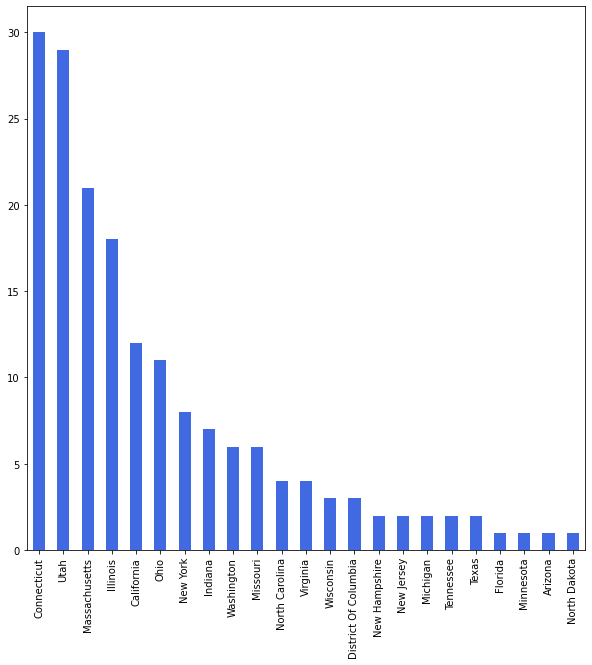

In [9]:
df1=Df1["state"].value_counts().plot(kind = 'bar', figsize=(10, 10),color='royalblue')

From the next visualization, we can see the total number of each locale in 23 states: Number of suburbs = 104 suburbs, Number of rural = 33 rural, Number of Cities = 29 cities, and Number of towns = 10 towns.

Text(0, 0.5, 'Totel number of each locale in 23 state')

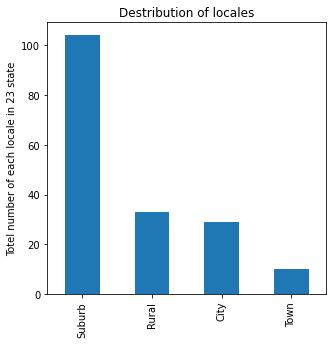

In [11]:
df=Df1['locale'].value_counts().plot(kind="bar",figsize=(5, 5))
df.set_title('Destribution of locales')
df.set_ylabel('Totel number of each locale in 23 state')

Now we will see a pie figure about the distribution of the percentage of students identified as Black or Hispanic in the states , we can see that Connecticut is the biggest.

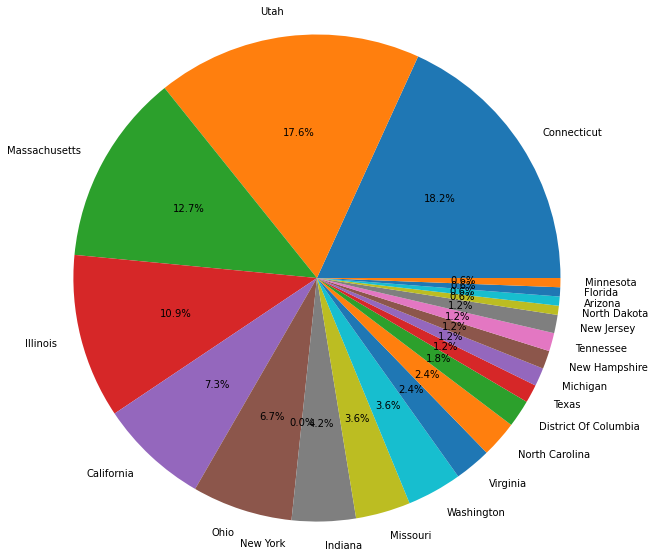

In [12]:
lis=['Connecticut','Utah','Massachusetts','Illinois','California','Ohio','New York ','Indiana',
     'Missouri','Washington','Virginia','North Carolina','District Of Columbia','Texas','Michigan',
     'New Hampshire','Tennessee','New Jersey','North Dakota','Arizona','Florida','Minnesota']
df2 = []
for i in lis:
     df2.append(Df1.loc[Df1['state']==i].value_counts('pct_black/hispanic').sum())
fig1, ax1 = plt.subplots()
ax1.pie(df2, labels=lis, autopct='%1.1f%%',radius =2.8)
plt.show()


This pie illustrates the distribution of the percentage of students identified in the districts eligible for free or reduced-price lunch.

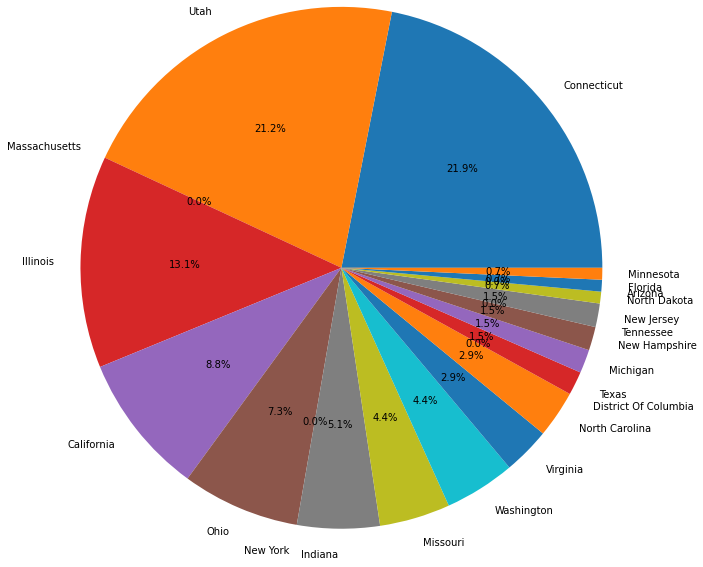

In [13]:
lis=['Connecticut','Utah','Massachusetts','Illinois','California','Ohio','New York ','Indiana',
     'Missouri','Washington','Virginia','North Carolina','District Of Columbia','Texas','Michigan',
     'New Hampshire','Tennessee','New Jersey','North Dakota','Arizona','Florida','Minnesota']
df3 = []
for i in lis:
    df3.append(Df1.loc[Df1['state']==i].value_counts('pct_free/reduced').sum())
fig1, ax1 = plt.subplots()
ax1.pie(df3, labels=lis, autopct='%1.1f%%',radius =3)
plt.show()

The average expenses for 8 states [ Utah,Massachusetts,Illinois, New Jersey ,
Indiana, Florida , Texas ,Tennessee ]

In [14]:
li =['[6000, 8000[','[8000, 10000[','[10000, 12000[','[12000, 14000[','[14000, 16000[','[16000, 18000[','[18000, 20000[','[20000, 22000[','[22000, 24000[','[32000, 34000[']
expenditure_6000_8000 = 0
expenditure_8000_10000 = 0
expenditure_10000_12000 = 0
expenditure_12000_14000 = 0
expenditure_14000_16000 = 0
expenditure_16000_18000 = 0
expenditure_18000_20000 = 0
expenditure_20000_22000 = 0
expenditure_22000_24000 = 0
expenditure_32000_34000 = 0
lis=['Connecticut','Utah','Massachusetts','Illinois','California','Ohio','New York ','Indiana',
     'Missouri','Washington','Virginia','North Carolina','District Of Columbia','Texas','Michigan',
     'New Hampshire','Tennessee','New Jersey','North Dakota','Arizona','Florida','Minnesota']
for j in li:
    if j == '[6000, 8000[':
        v = Df1.loc[Df1['state']== 'Utah' ].value_counts('pp_total_raw')[j].sum()
        expenditure_6000_8000 += v 
    elif j == '[8000, 10000[':
        v = Df1.loc[Df1['state']== 'Utah' ].value_counts('pp_total_raw')[j].sum()
        expenditure_8000_10000 += v
    elif j == '[10000, 12000[':
        v = Df1.loc[Df1['state']== 'Utah' ].value_counts('pp_total_raw')[j].sum()
        expenditure_10000_12000 += v
    elif j == '[16000, 180000[':
        v = Df1.loc[Df1['state']== 'Utah' ].value_counts('pp_total_raw')[j].sum()
        expenditure_16000_18000 += v  
    
average_expenses = {"Utah":225000,"Massachusetts":199100,"Illinois":210000,"New Jersey":34000,
                   "Indiana":119000,"Florida":7000,"Texas":34000,"Tennessee":34000}
for key in average_expenses:
    print('Average expenses of',key, '=', average_expenses[key])


Average expenses of Utah = 225000
Average expenses of Massachusetts = 199100
Average expenses of Illinois = 210000
Average expenses of New Jersey = 34000
Average expenses of Indiana = 119000
Average expenses of Florida = 7000
Average expenses of Texas = 34000
Average expenses of Tennessee = 34000


Now we will see the residential fixed high-speed connections over 200 kbps in at least one direction/households for each state 

<AxesSubplot:title={'center':'the residential fixed high-speed connections for each state'}>

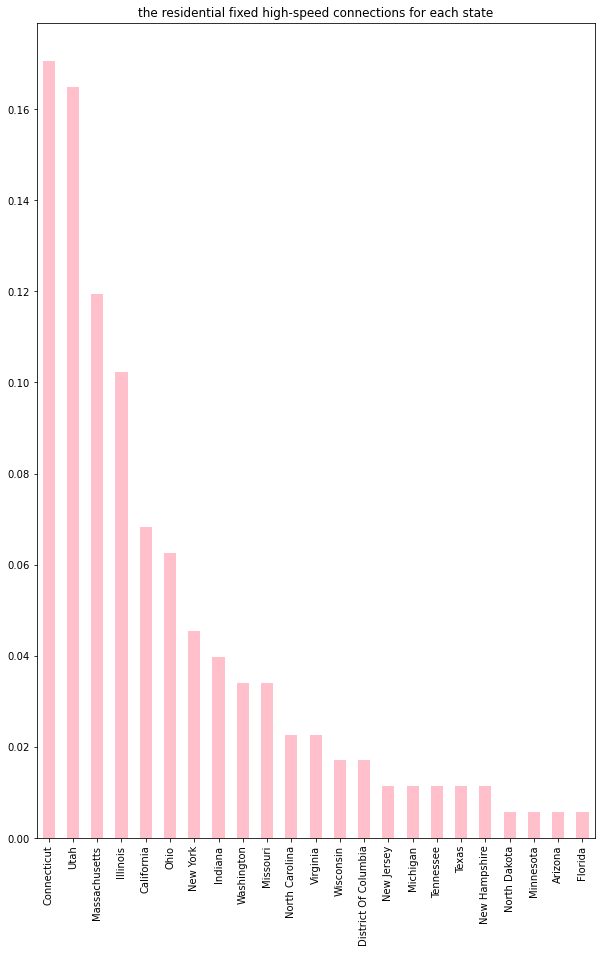

In [4]:
Df1['state'].value_counts('county_connections_ratio').plot(kind = 'bar', title='the residential fixed high-speed connections for each state',figsize=(10, 15),color='pink')

###  Merging

In this part, I will merge the products_info.csv file (columns that are called: Product Name, Provider/Company Name, Sector(s), and Primary Essential Function) with all CSV files in the engagement_data folder.

In [ ]:
csv_files = glob.glob(os.path.join("C:/Users/hp/Desktop/Kaggle/engagement_data/", "*.csv"))
filename =os.listdir(path)
for f ,k in zip(csv_files,range(len(filename))):
    df = pd.read_csv(f)
    df.insert(4, "Product Name"," ")
    df.insert(5,"Provider/Company Name"," ")
    df.insert(6,"Sector(s)"," ")
    df.insert(7,"Primary Essential Function"," ")
    for i in range (len(Df4["LP ID"])):
        for j in range (len(df['lp_id'])):
            if  Df4['LP ID'].loc[i]== df['lp_id'].loc[j]:
                df['Product Name'].loc[j]= Df4["Product Name"].iloc[i]
                df['Provider/Company Name'].loc[j]= Df4["Provider/Company Name"].iloc[i]
                df['Sector(s)'].loc[j] = Df4["Sector(s)"].iloc[i]
                df['Primary Essential Function'].loc[j] = Df4["Primary Essential Function"].iloc[i]
    df.to_csv(os.path.join( filename[k] ))    

An example of how engagement_data_after_merging looks like. Note(engagement_data_after_merging folder contains 233 CSV file)

In [9]:
Df6 = pd.read_csv('C:/Users/hp/Desktop/Kaggle/engagement_data_after_merging/1000.csv')
Df6.head()

,Unnamed: 0,time,lp_id,pct_access,engagement_index,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,0,2020-01-01,93690.0,0.00,NaN,Calculator.com,Calculator.com,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference"
1,1,2020-01-01,17941.0,0.03,0.90,Kids A-Z,Lazel Inc.,PreK-12,LC - Digital Learning Platforms
2,2,2020-01-01,65358.0,0.03,1.20,Prezi,Prezi Inc.,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation
3,3,2020-01-01,98265.0,0.57,37.79,Quizlet,Quizlet,PreK-12,LC - Study Tools
4,4,2020-01-01,59257.0,0.00,NaN,Issuu,Issuu,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation


#### -What is the picture of digital connectivity and engagement in 2020?


First we have to know the total Percentage of students in the district have at least one page-load event of a given product and on a given day (pct_access) for each state.
Note(Washington = 564.535)

In [7]:
my_directory = 'C:/Users/hp/Desktop/Kaggle/states/'
filename =os.listdir(my_directory)
count = -1
for folder, sub_folders, files in os.walk(my_directory):
    total = 0
    for special_file in files:
        file_path = os.path.join(folder, special_file)
        df = pd.read_csv(file_path) 
        total = df['pct_access'].sum()/100
    print(filename[count],'= ',total)
    print('______________________________________________________________________________')
    count += 1


Washington =  0
______________________________________________________________________________
Arizona =  584.8661
______________________________________________________________________________
California =  347.0769000000001
______________________________________________________________________________
Connecticut =  529.9588
______________________________________________________________________________
District_Of_Columbia =  631.7948
______________________________________________________________________________
Florida =  579.1769
______________________________________________________________________________
Illinois =  750.7279000000001
______________________________________________________________________________
Indiana =  729.1944
______________________________________________________________________________
Massachusetts =  483.6443
______________________________________________________________________________
Michigan =  296.8328
_______________________________________________

Second we will calculate the total page-load events per one thousand students of a given product and on a given day
(engagement_index).Note( Washington = 13681.14)

In [13]:
my_directory = 'C:/Users/hp/Desktop/Kaggle/states/'
filename =os.listdir(my_directory)
count = -1
for folder, sub_folders, files in os.walk(my_directory):
    total = 0
    for special_file in files:
        file_path = os.path.join(folder, special_file)
        df = pd.read_csv(file_path) 
        total = (df['engagement_index'].sum())/1000
    print(filename[count],'= ',total)
    print('______________________________________________________________________________')
    count += 1

Washington =  0
______________________________________________________________________________
Arizona =  17221.841780000002
______________________________________________________________________________
California =  9224.99791
______________________________________________________________________________
Connecticut =  15086.27901
______________________________________________________________________________
District_Of_Columbia =  10949.380560000001
______________________________________________________________________________
Florida =  13136.322819999998
______________________________________________________________________________
Illinois =  15891.642619999997
______________________________________________________________________________
Indiana =  20716.65009
______________________________________________________________________________
Massachusetts =  12118.63334
______________________________________________________________________________
Michigan =  7163.47429
____________

#### -What is the effect of the COVID-19 pandemic on online and distance learning, and how might this also evolve in the future?

we need to know what sectors of users that use learning product in each state.

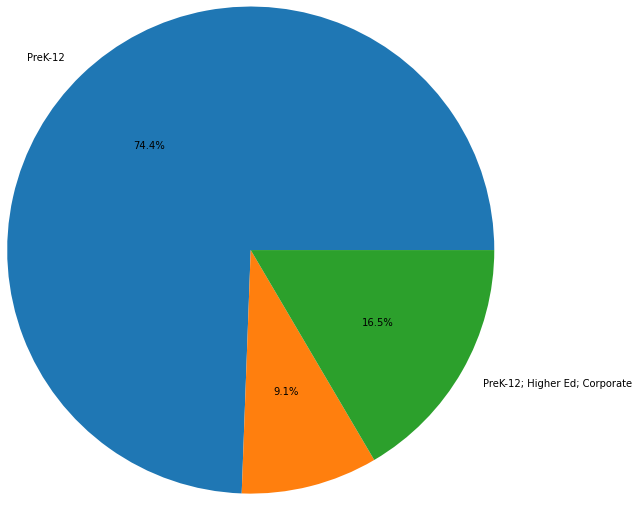

{'PreK-12': 189, ' ': 23, 'PreK-12; Higher Ed; Corporate': 42}

In [12]:
def most_frequent2(my_directory):
    Directory = my_directory
    filename =os.listdir(Directory)
    prod = []
    for folder, sub_folders, files in os.walk(Directory):
        for special_file in files:
            file_path = os.path.join(folder, special_file)
            df = pd.read_csv(file_path)            
            prod.append(df['Sector(s)'].value_counts().index.tolist()[1]) 
    return prod
my_directory = 'C:/Users/hp/Desktop/Kaggle/states/'
df = most_frequent2(my_directory)
dic = {'PreK-12':189}
#254 is the lenght of df
for i,j in zip(df,range(254)):
    if i != 'PreK-12':
        dic[i]= df.count(i)   
hg= sorted(dic.items(), key=lambda x: x[1], reverse=True)
fig1, ax1 = plt.subplots()
ax1.pie(dic.values(), labels=dic.keys(), autopct='%1.1f%%',radius =2.8)
plt.show()

in the previous cell, we can see that most of the learning products are used in PreK-12 and Higher Ed,
so in the future, these products will be used for more education sections, and the use of these products will grow up in Corporates.

Now we will illustrate the frequent numbers of learning digital products in each state.

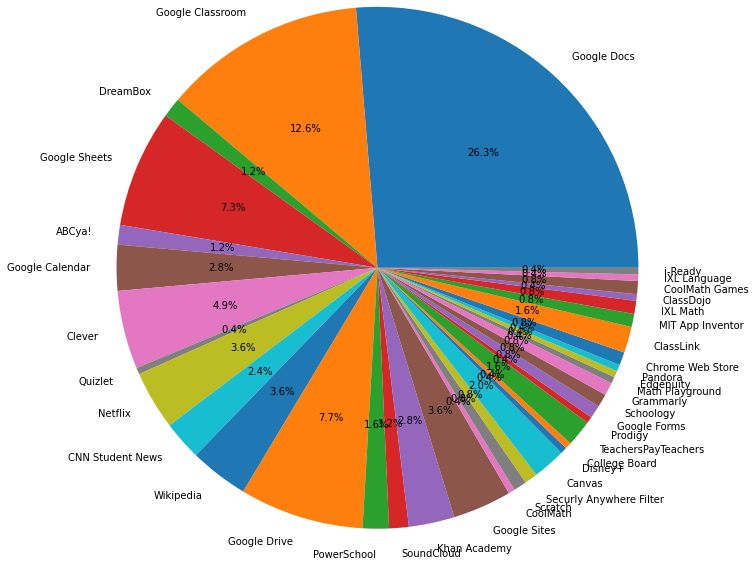

In [19]:
def most_frequent(my_directory):
    Directory = my_directory
    filename =os.listdir(Directory)
    prod = []
    for folder, sub_folders, files in os.walk(Directory):
        for special_file in files:
            file_path = os.path.join(folder, special_file)
            df = pd.read_csv(file_path)            
            prod.append(df['Product Name'].value_counts().index.tolist()[1]) 
    return prod
my_directory = 'C:/Users/hp/Desktop/Kaggle/states/'
df = most_frequent(my_directory)
dic2 = { 'Google Docs':65}
# 235 is the length of df
for i,j in zip(df,range(235)):
    if i != 'Google Docs':
        dic2[i]= df.count(i) 
#print(dfe)  
#hg= sorted(dfe.items(), key=lambda x: x[1], reverse=True)
fig1, ax1 = plt.subplots()
ax1.pie(dic2.values(), labels=dic2.keys(), autopct='%1.1f%%',radius =3)
plt.show()

From the previous code, we can see that the most frequent learning products in all states are: Google Docs', 65), ('Google Drive', 28), ('Google Classroom', 20), ('Google Calendar', 15), ('Google Sheets', 14), ('Disney+', 12), ('Clever', 12).

#### -How does student engagement with different types of education technology change over the course of the pandemic?

For this question, I will divide 2020 for to sections (from 2020-01-01 to 2020-06-30 )and 
(from 2020-07-01 to 2020-12-31) to evaluate the Total page-load events per one thousand students of a given product and on a given day for the two sections in all states.
(Washington =  44750.87)

In [14]:
my_directory = 'C:/Users/hp/Desktop/Kaggle/states/'
filename =os.listdir(my_directory)
count = -1
for folder, sub_folders, files in os.walk(my_directory):
    total = 0
    for special_file in files:
        file_path = os.path.join(folder, special_file)
        df = pd.read_csv(file_path) 
        total = df.loc[df['time'] <= '2020-06-30','engagement_index'].sum()/100    
    print(filename[count],'= ',total)
    print('______________________________________________________________________________')
    count += 1

Washington =  0
______________________________________________________________________________
Arizona =  64550.3833
______________________________________________________________________________
California =  3469.0228
______________________________________________________________________________
Connecticut =  75721.2988
______________________________________________________________________________
District_Of_Columbia =  42539.6745
______________________________________________________________________________
Florida =  49934.238099999995
______________________________________________________________________________
Illinois =  85494.24699999999
______________________________________________________________________________
Indiana =  84198.2771
______________________________________________________________________________
Massachusetts =  59599.7255
______________________________________________________________________________
Michigan =  15571.2708
_________________________________

In [15]:
my_directory = 'C:/Users/hp/Desktop/Kaggle/states/'
filename =os.listdir(my_directory)
count = -1
for folder, sub_folders, files in os.walk(my_directory):
    total= 0
    for special_file in files:
        file_path = os.path.join(folder, special_file)
        df = pd.read_csv(file_path) 
        total = df.loc[(df['time'] >= '2020-07-01'),'engagement_index'].sum()/100    
    print(filename[count],'= ',total)
    print('______________________________________________________________________________')
    count += 1

Washington =  0
______________________________________________________________________________
Arizona =  107668.0345
______________________________________________________________________________
California =  88780.95629999999
______________________________________________________________________________
Connecticut =  75141.49130000001
______________________________________________________________________________
District_Of_Columbia =  66954.1311
______________________________________________________________________________
Florida =  81428.9901
______________________________________________________________________________
Illinois =  73422.1792
______________________________________________________________________________
Indiana =  122968.2238
______________________________________________________________________________
Massachusetts =  61586.60790000001
______________________________________________________________________________
Michigan =  56063.4721
________________________

#### How does student engagement with online learning platforms relate to different geography? Demographic context (e.g., race/ethnicity, ESL, learning disability)? Socioeconomic status?

This question is composed of some parts; first, we can see from the next code that each state 
differs from each other.

In [16]:
my_directory = 'C:/Users/hp/Desktop/Kaggle/states/'
filename =os.listdir(my_directory)
count = -1
for folder, sub_folders, files in os.walk(my_directory):
    total = 0
    for special_file in files:
        file_path = os.path.join(folder, special_file)
        df = pd.read_csv(file_path) 
        total = df['engagement_index'].sum()/100
    print(filename[count],'= ',total)
    print('______________________________________________________________________________')
    count += 1

Washington =  0
______________________________________________________________________________
Arizona =  172218.41780000002
______________________________________________________________________________
California =  92249.9791
______________________________________________________________________________
Connecticut =  150862.79009999998
______________________________________________________________________________
District_Of_Columbia =  109493.8056
______________________________________________________________________________
Florida =  131363.22819999998
______________________________________________________________________________
Illinois =  158916.4262
______________________________________________________________________________
Indiana =  207166.50089999998
______________________________________________________________________________
Massachusetts =  121186.3334
______________________________________________________________________________
Michigan =  71634.7429
____________

Second, from a previous figure, we know that the most percentage of students identified as Black or Hispanic in Connecticut = 18.2% Utah = 17.6% Massachusetts = 12.7% so we will evaluate the student engagement with online learning for these three states.

In [17]:
my_directory = 'C:/Users/hp/Desktop/Kaggle/states/'
filename =os.listdir(my_directory)
count = -1
for folder, sub_folders, files in os.walk(my_directory):
    total = 0
    if folder == 'C:/Users/hp/Desktop/Kaggle/states/Connecticut' or folder == 'C:/Users/hp/Desktop/Kaggle/states/Utah' or  folder == 'C:/Users/hp/Desktop/Kaggle/states/Massachusetts':
        print(filename[count])
        for special_file in files:
            file_path = os.path.join(folder, special_file)
            df = pd.read_csv(file_path)            
            total += df['engagement_index'].sum()/1000
        print(total)
        print('________________________________________________________________')
    count += 1

Connecticut
494227.24476000003
________________________________________________________________
Massachusetts
302150.49572999997
________________________________________________________________
Utah
232283.77723
________________________________________________________________


From a previous figure, we know that the most Percentage of students identified as the districts eligible for free or reduced-price lunch in Connecticut = 21.9%,
Utah = 21.2% and
Illinois = 13.1% so we will evaluate the student engagement with online learning for these three states.

In [18]:
my_directory = 'C:/Users/hp/Desktop/Kaggle/states/'
filename =os.listdir(my_directory)
count = -1
for folder, sub_folders, files in os.walk(my_directory):
    total = 0
    if folder == 'C:/Users/hp/Desktop/Kaggle/states/Connecticut' or folder == 'C:/Users/hp/Desktop/Kaggle/states/Utah' or  folder == 'C:/Users/hp/Desktop/Kaggle/states/Illinois':
        print(filename[count])
        for special_file in files:
            file_path = os.path.join(folder, special_file)
            df = pd.read_csv(file_path)            
            total += df['engagement_index'].sum()/1000
        print(total)
        print('________________________________________________________________')
    count += 1

Connecticut
494227.24476000003
________________________________________________________________
Illinois
361593.1230800001
________________________________________________________________
Utah
232283.77723
________________________________________________________________


Third, from a previous figure, we know that Utah, Massachusetts, and Illinois have the most Average expenses of all states
(Average expenses of Utah = 225000
Average expenses of Massachusetts = 199100
Average expenses of Illinois = 210000)so we will evaluate the student engagement with online learning for these three states.

In [19]:
my_directory = 'C:/Users/hp/Desktop/Kaggle/states/'
filename =os.listdir(my_directory)
count = -1
for folder, sub_folders, files in os.walk(my_directory):
    total = 0
    if folder == 'C:/Users/hp/Desktop/Kaggle/states/Utah' or folder == 'C:/Users/hp/Desktop/Kaggle/states/Massachusetts' or  folder == 'C:/Users/hp/Desktop/Kaggle/states/Illinois':
        print(filename[count])
        for special_file in files:
            file_path = os.path.join(folder, special_file)
            df = pd.read_csv(file_path)            
            total += df['engagement_index'].sum()/1000
        print(total)
        print('________________________________________________________________')
    count += 1

Illinois
361593.1230800001
________________________________________________________________
Massachusetts
302150.49572999997
________________________________________________________________
Utah
232283.77723
________________________________________________________________


#### Do certain state interventions, practices or policies (e.g., stimulus, reopening, eviction moratorium) correlate with the increase or decrease online engagement?

From previous analysis, we know that the residential fixed high-speed connections over 200 kbps in at least one direction/households are the biggest in
Connecticut = 0.170455,
Utah = 0.164773,
Massachusetts = 0.119318
and the distribution of Percentage of students identified in the districts eligible for free or reduced-price lunch is the biggest in
Connecticut = 21.9%, Utah = 21.2% and Illinois = 13.1% 
so yes, it correlates with the increase or decrease in online engagement. 